**Name**: Linh Khanh Vo
**Student number**: 1661618
**Class**: MDD-01
**Date**: 04/04/2023

# Modeling

## Loading packages

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
pd.options.mode.chained_assignment = None

## Reading dataset

In [106]:
df = pd.read_csv("https://raw.githubusercontent.com/lynnevo170701/Mathematics_Modeling/main/1661618webshop.csv")

## Assignments

**Part 1: preparing the data**
*a.	There are some missing values in the data. You will need to deal with these later. For now, simply remove the rows containing missing data.*

- First, I want to know how many missing values there are in each variable

In [107]:
df.isnull().sum() #checking how many missing values there are in each variable

Purchase_Amount                 0
Time_Spent_on_Website           0
Number_of_products_browsed      0
Pictures                        0
Shipping_Time                   0
Review_rating                   0
Find_website                  135
Ease_of_purchase              226
Age                             0
Device                          0
dtype: int64

- Second, I create a new `df1` by copy `df`. I want to keep `df` intact for other requirements below when I need to use dataframe including missing values. And then I remove all the missing values in df1.

In [108]:
df1 = df.copy() # create a copy of df as df1 that doesn't include missing values
df1 = df1.dropna() # removing all the rows that have missing values
df1

,Purchase_Amount,Time_Spent_on_Website,Number_of_products_browsed,Pictures,Shipping_Time,Review_rating,Find_website,Ease_of_purchase,Age,Device
0,685.23,1306,30,3.7,3.87,3.9,Friends_or_Family,4.0,37,PC
1,622.03,799,20,3.2,4.11,4.2,Search_Engine,4.0,42,PC
2,589.52,694,16,3.4,4.56,3.9,Search_Engine,4.0,40,PC
3,219.42,666,16,3.9,4.17,3.2,Social_Media_Advertisement,4.0,72,PC
4,503.56,466,8,5.2,2.94,3.6,Search_Engine,3.0,49,PC
...,...,...,...,...,...,...,...,...,...,...
1883,598.98,1335,32,1.5,2.52,3.5,Search_Engine,5.0,60,PC
1884,714.47,1072,23,3.0,4.51,3.5,Social_Media_Advertisement,4.0,49,PC
1885,483.78,370,7,2.8,3.86,4.4,Social_Media_Advertisement,5.0,50,PC
1887,596.18,853,19,3.1,3.58,3.9,Search_Engine,4.0,56,PC


*b.	Run the model with all the independent variables, don’t forget to make dummy variable where appropriate. Are there outliers in the data? If so, report how you found out and explain how you dealt with this. Also explain the effect dealing with these outliers had on your model results.*

- First, I will clean the data by removing all the negative values in `Time_Spent_on_Website` and `Number_of_products_browsed`.

In [109]:
#cleaning data before using it for further questions
df1 = df1[(df1.Time_Spent_on_Website > 0) | (df1.Number_of_products_browsed > 0)]
df1 #35 rows are removed

,Purchase_Amount,Time_Spent_on_Website,Number_of_products_browsed,Pictures,Shipping_Time,Review_rating,Find_website,Ease_of_purchase,Age,Device
0,685.23,1306,30,3.7,3.87,3.9,Friends_or_Family,4.0,37,PC
1,622.03,799,20,3.2,4.11,4.2,Search_Engine,4.0,42,PC
2,589.52,694,16,3.4,4.56,3.9,Search_Engine,4.0,40,PC
3,219.42,666,16,3.9,4.17,3.2,Social_Media_Advertisement,4.0,72,PC
4,503.56,466,8,5.2,2.94,3.6,Search_Engine,3.0,49,PC
...,...,...,...,...,...,...,...,...,...,...
1883,598.98,1335,32,1.5,2.52,3.5,Search_Engine,5.0,60,PC
1884,714.47,1072,23,3.0,4.51,3.5,Social_Media_Advertisement,4.0,49,PC
1885,483.78,370,7,2.8,3.86,4.4,Social_Media_Advertisement,5.0,50,PC
1887,596.18,853,19,3.1,3.58,3.9,Search_Engine,4.0,56,PC


- Second, I will create dummy variable for `Find_website`, `Ease_of_purchase` and `Device`.

In [110]:
print(df1['Find_website'].value_counts()) #print out value counts
print(df1['Device'].value_counts())
print(df1['Ease_of_purchase'].value_counts())

Search_Engine                 850
Social_Media_Advertisement    530
Friends_or_Family             117
Other                          21
Name: Find_website, dtype: int64
PC        1079
Mobile     439
Name: Device, dtype: int64
4.0    1031
5.0     246
3.0     239
2.0       2
Name: Ease_of_purchase, dtype: int64


In [111]:
df1_dummies = pd.get_dummies(df1[['Find_website', 'Device']])
df1_dummies_1 = pd.get_dummies(df1['Ease_of_purchase'], prefix = 'Ease_of_purchase')
df1 = pd.concat([df1, #originial dataset
                 df1_dummies,
                 df1_dummies_1], # dummies values
                axis = 1) #concatenate along the columns
df1

,Purchase_Amount,Time_Spent_on_Website,Number_of_products_browsed,Pictures,Shipping_Time,Review_rating,Find_website,Ease_of_purchase,Age,Device,Find_website_Friends_or_Family,Find_website_Other,Find_website_Search_Engine,Find_website_Social_Media_Advertisement,Device_Mobile,Device_PC,Ease_of_purchase_2.0,Ease_of_purchase_3.0,Ease_of_purchase_4.0,Ease_of_purchase_5.0
0,685.23,1306,30,3.7,3.87,3.9,Friends_or_Family,4.0,37,PC,1,0,0,0,0,1,0,0,1,0
1,622.03,799,20,3.2,4.11,4.2,Search_Engine,4.0,42,PC,0,0,1,0,0,1,0,0,1,0
2,589.52,694,16,3.4,4.56,3.9,Search_Engine,4.0,40,PC,0,0,1,0,0,1,0,0,1,0
3,219.42,666,16,3.9,4.17,3.2,Social_Media_Advertisement,4.0,72,PC,0,0,0,1,0,1,0,0,1,0
4,503.56,466,8,5.2,2.94,3.6,Search_Engine,3.0,49,PC,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,598.98,1335,32,1.5,2.52,3.5,Search_Engine,5.0,60,PC,0,0,1,0,0,1,0,0,0,1
1884,714.47,1072,23,3.0,4.51,3.5,Social_Media_Advertisement,4.0,49,PC,0,0,0,1,0,1,0,0,1,0
1885,483.78,370,7,2.8,3.86,4.4,Social_Media_Advertisement,5.0,50,PC,0,0,0,1,0,1,0,0,0,1
1887,596.18,853,19,3.1,3.58,3.9,Search_Engine,4.0,56,PC,0,0,1,0,0,1,0,0,1,0


In [112]:
df1 = df1.rename(columns={'Ease_of_purchase_2.0': 'Ease_of_purchase_2', 'Ease_of_purchase_3.0': 'Ease_of_purchase_3', 'Ease_of_purchase_4.0': 'Ease_of_purchase_4', 'Ease_of_purchase_5.0': 'Ease_of_purchase_5' })

- Third, I will create a model with y = `Purchase_Amount` and x = some of the variables in `df1` except for `Purchase_Amount` and reference categories.

In [113]:
#create model1 by selecting variables from df1
#`Find_website_Search_Engine`, 'Device_PC' and `Ease_of_purchase_4` will be reference categories.
model1 = sm.ols('Purchase_Amount~Time_Spent_on_Website+Number_of_products_browsed+Pictures+Shipping_Time+Review_rating+Age+Find_website_Social_Media_Advertisement+Find_website_Other+Find_website_Friends_or_Family+Device_Mobile+Ease_of_purchase_2+Ease_of_purchase_3+Ease_of_purchase_5', data = df1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     166.7
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          4.71e-280
Time:                        16:37:08   Log-Likelihood:                -8514.7
No. Observations:                1518   AIC:                         1.706e+04
Df Residuals:                    1504   BIC:                         1.713e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

- Next, I use CooksD to find out which rows are outliers

In [114]:
#create outliers column in df1
CooksD = model1.get_influence().cooks_distance
n = len(df1)
df1['Outlier'] = CooksD[0] > 4/n

#outliers == TRUE to see all the outliers in df1
df1[df1.Outlier == True]

,Purchase_Amount,Time_Spent_on_Website,Number_of_products_browsed,Pictures,Shipping_Time,Review_rating,Find_website,Ease_of_purchase,Age,Device,...,Find_website_Other,Find_website_Search_Engine,Find_website_Social_Media_Advertisement,Device_Mobile,Device_PC,Ease_of_purchase_2,Ease_of_purchase_3,Ease_of_purchase_4,Ease_of_purchase_5,Outlier
3,219.42,666,16,3.9,4.17,3.2,Social_Media_Advertisement,4.0,72,PC,...,0,0,1,0,1,0,0,1,0,True
17,412.71,766,16,1.5,2.23,4.3,Search_Engine,5.0,66,Mobile,...,0,1,0,1,0,0,0,0,1,True
25,394.04,756,19,2.1,3.46,3.2,Social_Media_Advertisement,3.0,26,PC,...,0,0,1,0,1,0,1,0,0,True
30,324.03,881,22,3.7,3.05,4.0,Social_Media_Advertisement,4.0,71,PC,...,0,0,1,0,1,0,0,1,0,True
59,439.79,1186,26,4.4,2.29,3.4,Social_Media_Advertisement,4.0,69,PC,...,0,0,1,0,1,0,0,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,489.46,916,21,3.7,3.00,3.7,Social_Media_Advertisement,3.0,27,PC,...,0,0,1,0,1,0,1,0,0,True
1780,525.71,1209,30,2.7,1.01,3.4,Social_Media_Advertisement,4.0,22,PC,...,0,0,1,0,1,0,0,1,0,True
1828,496.99,997,24,1.9,2.65,4.1,Search_Engine,4.0,24,PC,...,0,1,0,0,1,0,0,1,0,True
1843,439.41,899,21,3.0,2.46,4.2,Search_Engine,4.0,24,PC,...,0,1,0,0,1,0,0,1,0,True


Now, I will use two models:
- model1 contains all the data without negative values in `Time_Spent_on_Website` and `Number_of_products_browsed`.
- model2 contains all the data without negative values in `Time_Spent_on_Website` and `Number_of_products_browsed` and all the outliers

In [115]:
#remove all the outliers
df2 = df1[df1.Outlier == False]
df2 #89 rows of outliers == TRUE are removed

,Purchase_Amount,Time_Spent_on_Website,Number_of_products_browsed,Pictures,Shipping_Time,Review_rating,Find_website,Ease_of_purchase,Age,Device,...,Find_website_Other,Find_website_Search_Engine,Find_website_Social_Media_Advertisement,Device_Mobile,Device_PC,Ease_of_purchase_2,Ease_of_purchase_3,Ease_of_purchase_4,Ease_of_purchase_5,Outlier
0,685.23,1306,30,3.7,3.87,3.9,Friends_or_Family,4.0,37,PC,...,0,0,0,0,1,0,0,1,0,False
1,622.03,799,20,3.2,4.11,4.2,Search_Engine,4.0,42,PC,...,0,1,0,0,1,0,0,1,0,False
2,589.52,694,16,3.4,4.56,3.9,Search_Engine,4.0,40,PC,...,0,1,0,0,1,0,0,1,0,False
4,503.56,466,8,5.2,2.94,3.6,Search_Engine,3.0,49,PC,...,0,1,0,0,1,0,1,0,0,False
5,584.44,833,19,3.4,2.27,4.0,Search_Engine,4.0,51,PC,...,0,1,0,0,1,0,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,598.98,1335,32,1.5,2.52,3.5,Search_Engine,5.0,60,PC,...,0,1,0,0,1,0,0,0,1,False
1884,714.47,1072,23,3.0,4.51,3.5,Social_Media_Advertisement,4.0,49,PC,...,0,0,1,0,1,0,0,1,0,False
1885,483.78,370,7,2.8,3.86,4.4,Social_Media_Advertisement,5.0,50,PC,...,0,0,1,0,1,0,0,0,1,False
1887,596.18,853,19,3.1,3.58,3.9,Search_Engine,4.0,56,PC,...,0,1,0,0,1,0,0,1,0,False


In [116]:
#create model2 selecting variables from df2
#`Find_website_Search_Engine`, 'Device_PC' and `Ease_of_purchase_4` will be reference categories.
model2 = sm.ols('Purchase_Amount~Time_Spent_on_Website+Number_of_products_browsed+Pictures+Shipping_Time+Review_rating+Age+Find_website_Social_Media_Advertisement+Find_website_Other+Find_website_Friends_or_Family+Device_Mobile+Ease_of_purchase_2+Ease_of_purchase_3+Ease_of_purchase_5', data = df2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     319.7
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:37:09   Log-Likelihood:                -7543.5
No. Observations:                1432   AIC:                         1.511e+04
Df Residuals:                    1419   BIC:                         1.518e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [117]:
Table = Stargazer([model1, model2])
Table.title('Models with or without Outliers ') #Give it a title
Table.custom_columns(['Model 1', 'Model 2'], [1,1]) #Give the models names
Table.show_model_numbers(False) #Remove model number
Table.significant_digits(2) #Change decimals to 2
Table.covariate_order(['Intercept','Time_Spent_on_Website','Number_of_products_browsed','Pictures','Shipping_Time','Review_rating','Age','Find_website_Social_Media_Advertisement','Find_website_Other','Find_website_Friends_or_Family','Device_Mobile', 'Ease_of_purchase_2','Ease_of_purchase_3','Ease_of_purchase_5'])
Table.custom_note_label('') #Remove the word "Note:"
Table.show_degrees_of_freedom(False) #Remove the degrees of freedom

HTML(Table.render_html())

The results have big gaps between two datasets. But I still use `df1` instead of `df2` because there is no reason to remove all these outliers after inspecting.

*c.	Check if there is multicollinearity between the independent variables. Show how you checked this and, if it causes problems, explain how you dealt with this.*

- First, I calculate VIF values to check the multicollinearity.

In [118]:
X = df1[['Time_Spent_on_Website', 'Number_of_products_browsed', 'Pictures',
         'Shipping_Time', 'Review_rating', 'Age', 'Find_website_Social_Media_Advertisement',
         'Find_website_Other', 'Find_website_Friends_or_Family', 'Device_Mobile',
         'Ease_of_purchase_2', 'Ease_of_purchase_3', 'Ease_of_purchase_5'
         ]]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor                                 features
0   189.370216                    Time_Spent_on_Website
1   191.562359               Number_of_products_browsed
2    10.600528                                 Pictures
3     9.912089                            Shipping_Time
4    29.095354                            Review_rating
5    18.403921                                      Age
6     1.618184  Find_website_Social_Media_Advertisement
7     1.030573                       Find_website_Other
8     1.141222           Find_website_Friends_or_Family
9     1.409638                            Device_Mobile
10    1.007818                       Ease_of_purchase_2
11    1.238810                       Ease_of_purchase_3
12    1.244430                       Ease_of_purchase_5


From the result of `vif`, It may be worth considering dropping one of the highly correlated variables (`Time_Spent_on_Website`, `Number_of_products_browsed`, `Review_rating`, or `Age`) to address the issue of multicollinearity.

PearsonRResult(statistic=0.005625470722385223, pvalue=0.8266515513561064)
PearsonRResult(statistic=0.9758569713122722, pvalue=0.0)
PearsonRResult(statistic=0.010128968420434106, pvalue=0.6933410896366342)


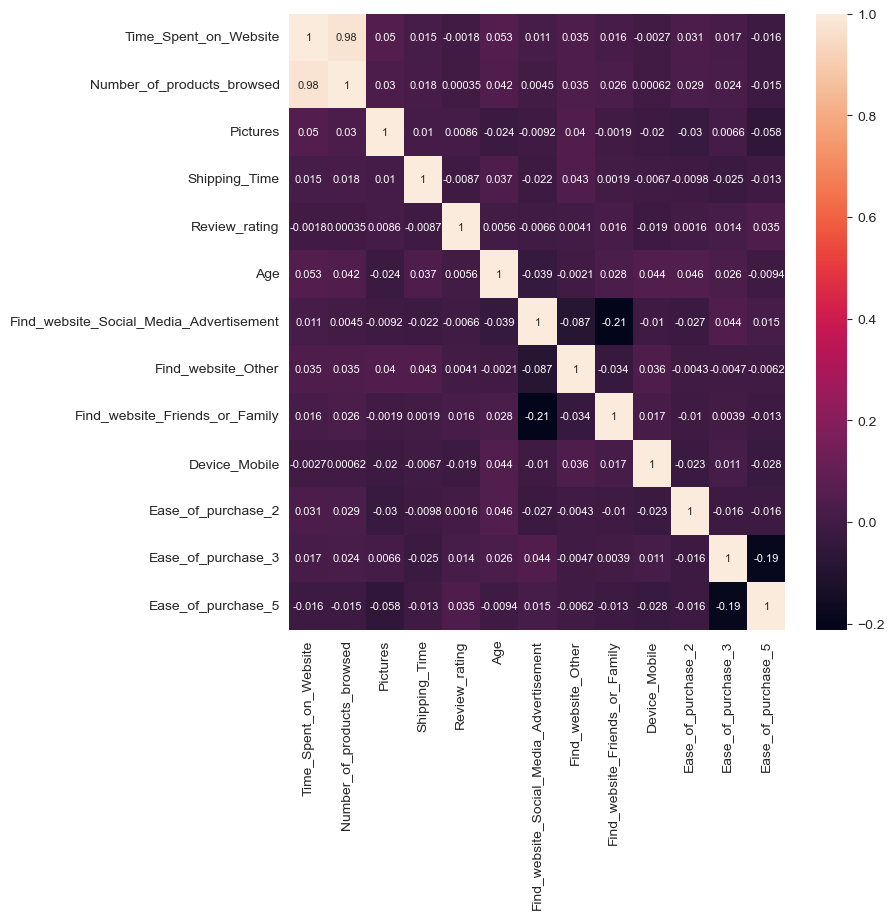

In [119]:
# Set the size of the figure
plt.figure(figsize=(8,8))

#Select independent variables from df2
independent_variables = df1[['Time_Spent_on_Website', 'Number_of_products_browsed', 'Pictures',
                             'Shipping_Time', 'Review_rating', 'Age', 'Find_website_Social_Media_Advertisement',
                             'Find_website_Other', 'Find_website_Friends_or_Family', 'Device_Mobile',
                             'Ease_of_purchase_2', 'Ease_of_purchase_3', 'Ease_of_purchase_5']]

#create correlation matrix
matrix = independent_variables.corr()

#create heatmap from the correlation matrix
sns.heatmap(matrix, annot = True, annot_kws={"fontsize":8})

print(scipy.stats.pearsonr(df1['Review_rating'], df1['Age']))
print(scipy.stats.pearsonr(df1['Time_Spent_on_Website'], df1['Number_of_products_browsed']))
print(scipy.stats.pearsonr(df1['Pictures'], df1['Shipping_Time']))

`Time_Spent_on_Website` and `Number_of_products_browsed` have really high correlation coefficient (0.98) and p-value for that correlation also satistically significant. Other correlation is not statistically significant. I check this combination to see if they produce any strange results when put in the same model.

- Second, I will check the combination of `Time_Spent_on_Website` and `Number_of_products_browsed`. In model1a, I use `Time_Spent_on_Website` and `Number_of_products_browsed` in the same model. In model1b, I want to check the model without `Time_Spent_on_Website` and in model1c, I want to check the model without `Number_of_products_browsed` to see the difference of results.

In [120]:
model1a = sm.ols('Purchase_Amount~Time_Spent_on_Website+Number_of_products_browsed', data = df1).fit()
print(model1a.summary()) #model1a with `Time_Spent_on_Website` and `Number_of_products_browsed`

model1b = sm.ols('Purchase_Amount~Number_of_products_browsed', data = df1).fit()
print(model1b.summary()) # model1b without `Time_Spent_on_Website`

model1c = sm.ols('Purchase_Amount~Time_Spent_on_Website', data = df1).fit()
print(model1c.summary()) # model1c without `Number_of_products_browsed`

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     892.7
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          7.09e-257
Time:                        16:37:16   Log-Likelihood:                -8601.1
No. Observations:                1518   AIC:                         1.721e+04
Df Residuals:                    1515   BIC:                         1.722e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [121]:
Table = Stargazer([model1a, model1b, model1c])
Table.title('The effect of multicollinearity ') #Give it a title
Table.custom_columns(['Model 1a', 'Model 1b', 'Model 1c'], [1,1,1]) #Give the models names
Table.show_model_numbers(False) #Remove model number
Table.significant_digits(2) #Change decimals to 2
Table.covariate_order(['Intercept','Time_Spent_on_Website','Number_of_products_browsed'])
Table.custom_note_label('') #Remove the word "Note:"
Table.show_degrees_of_freedom(False) #Remove the degrees of freedom

HTML(Table.render_html())

In model1b and model1c, `Number_of_products_browsed` and `Time_Spent_on_Website` are all statistically significant but when I put these two in the same model (model1a), the results are different: `Number_of_products_browsed` is not statistically significant. This can be explained by its high correlation. So I will remove one of them.

*d.	Check if there are non-linear relationships between the independent variables and the dependent variables. If there are, make the appropriate transformations. Show and explain how you found out and how you know the transformation makes the model better.*

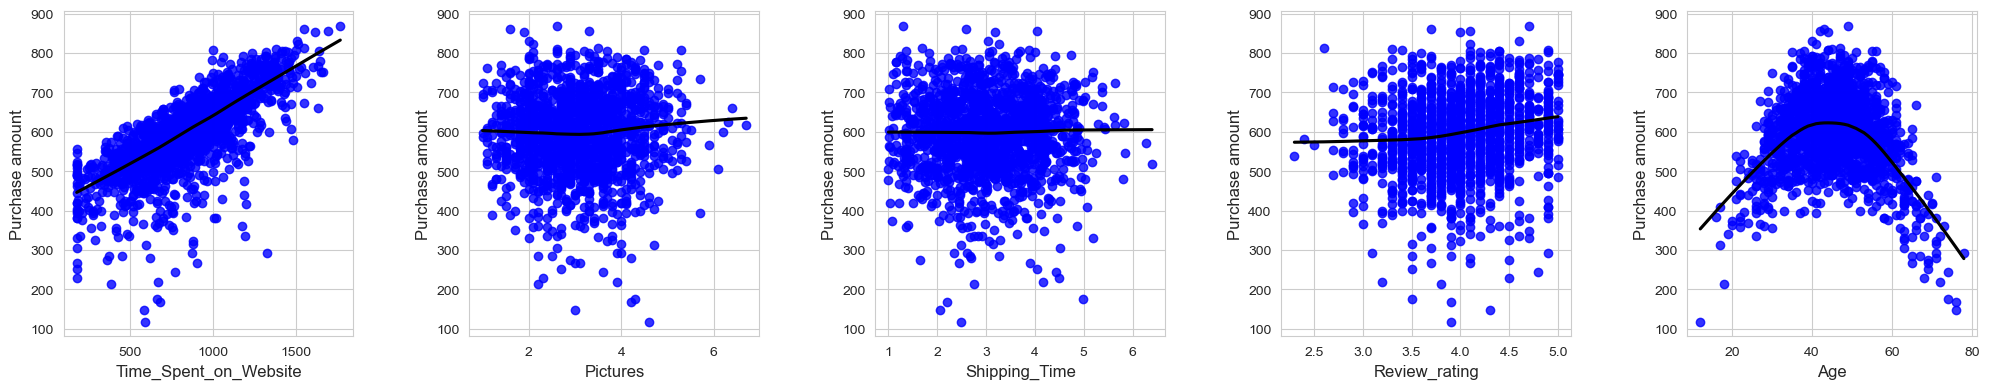

In [122]:
nx = 5
ny = 1
selected_cols = ['Time_Spent_on_Website', 'Pictures', 'Shipping_Time', 'Review_rating', 'Age']

fig, axs = plt.subplots(ny, nx, figsize=(20, 4))
for i, col in enumerate(selected_cols):
    ax = axs[int(i / ny)]
    sns.regplot(data=df1, x=col, y='Purchase_Amount', ax=ax, lowess = True, color='b', line_kws={"color": "black"})
    ax.set_xlabel(col, fontsize = 12)
    ax.set_ylabel("Purchase amount", fontsize=12)
fig.tight_layout()
plt.subplots_adjust(wspace=0.4)

In [123]:
#create squared variable
df1['Age2'] = pow(df1.Age,2)
#create models
model1d = sm.ols('Purchase_Amount~Age', data = df1).fit()
print(model1d.summary())
model1e = sm.ols('Purchase_Amount~Age+Age2', data = df1).fit()
print(model1e.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     18.84
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.52e-05
Time:                        16:37:20   Log-Likelihood:                -9182.7
No. Observations:                1518   AIC:                         1.837e+04
Df Residuals:                    1516   BIC:                         1.838e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    644.9117     12.277     52.528      0.0

In [124]:
Table = Stargazer([model1d, model1e])
Table.title('The effect of Age and Age2 ') #Give it a title
Table.custom_columns(['Model 1d', 'Model 1e'], [1,1]) #Give the models names
Table.show_model_numbers(False) #Remove model number
Table.significant_digits(2) #Change decimals to 2
Table.covariate_order(['Intercept','Age','Age2'])
Table.custom_note_label('') #Remove the word "Note:"
Table.show_degrees_of_freedom(False) #Remove the degrees of freedom

html = Table.render_html()
with open("model1d_1e.html", "w") as f:
    f.write(html)
HTML(Table.render_html())

while age modeled linearly is significant, the polynomial model has a higher (adjusted) R-squared. And the coefficient with the highest term(in this case is age^2) is negative so it has an inverted U-shape.

After removing outliers, checking multicollinearity and non-linear relationships, there are two changes from the initial model1: replace `Age` with `Age2` and remove `Number_of_products_browsed`.

In [125]:
#`Find_website_Search_Engine`, 'Device_PC' and `Ease_of_purchase_4` will be reference categories.
model1 = sm.ols('Purchase_Amount~Time_Spent_on_Website+Pictures+Shipping_Time+Review_rating+Age2+Find_website_Social_Media_Advertisement+Find_website_Other+Find_website_Friends_or_Family+Device_Mobile+Ease_of_purchase_2+Ease_of_purchase_3+Ease_of_purchase_5', data = df1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     204.4
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          1.86e-305
Time:                        16:37:20   Log-Likelihood:                -8458.1
No. Observations:                1518   AIC:                         1.694e+04
Df Residuals:                    1505   BIC:                         1.701e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

**Part 2: creating the model**
*a.	After the steps in part 1 are done, present the model in a table APA style. For each independent variable in the model, clearly explain what the output means in the context of the web shop.*

In [126]:
Table = Stargazer([model1])
Table.title('Model predicting Purchase amount spent on the website ') #Give it a title
Table.custom_columns(['Model 1'], [1]) #Give the models names
Table.show_model_numbers(False) #Remove model number
Table.significant_digits(2) #Change decimals to 2
Table.covariate_order(['Intercept','Time_Spent_on_Website','Pictures','Shipping_Time','Review_rating','Age2','Find_website_Social_Media_Advertisement','Find_website_Other','Find_website_Friends_or_Family','Device_Mobile','Ease_of_purchase_2','Ease_of_purchase_3','Ease_of_purchase_5'])
Table.custom_note_label('') #Remove the word "Note:"
Table.show_degrees_of_freedom(False) #Remove the degrees of freedom

HTML(Table.render_html())

*b.	Create a model in which the appropriate variables are standardized and present the results next to the model of part 2a. Note that standardization does not work for non-linear effects. Based on this model, which of the standardized variables has the largest effect on how the customers spend on average?*

In [127]:
df1_standardized = df1.copy()

scaler = StandardScaler()
df1_standardized[['Time_Spent_on_Website','Pictures','Shipping_Time', 'Review_rating']]= scaler.fit_transform(df1_standardized[['Time_Spent_on_Website', 'Pictures', 'Shipping_Time', 'Review_rating']])

#`Find_website_Social_Media_Advertisement`, 'Device_PC' and `Ease_of_purchase_4` will be reference categories.
model1_standardized = sm.ols('Purchase_Amount~Time_Spent_on_Website+Pictures+Shipping_Time+Review_rating+Age2+Find_website_Social_Media_Advertisement+Find_website_Other+Find_website_Friends_or_Family+Device_Mobile+Ease_of_purchase_2+Ease_of_purchase_3+Ease_of_purchase_5', data = df1_standardized).fit()
print(model1_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     204.4
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          1.86e-305
Time:                        16:37:20   Log-Likelihood:                -8458.1
No. Observations:                1518   AIC:                         1.694e+04
Df Residuals:                    1505   BIC:                         1.701e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [128]:
Table = Stargazer([model1, model1_standardized])
Table.title('Models predicting Purchase amount spent on the website ') #Give it a title
Table.custom_columns(['Model 1', 'Model 1 standardized'], [1,1]) #Give the models names
Table.show_model_numbers(False) #Remove model number
Table.significant_digits(2) #Change decimals to 2
Table.covariate_order(['Intercept','Time_Spent_on_Website','Pictures','Shipping_Time','Review_rating','Age2','Find_website_Social_Media_Advertisement','Find_website_Other','Find_website_Friends_or_Family','Device_Mobile', 'Ease_of_purchase_2','Ease_of_purchase_3','Ease_of_purchase_5'])
Table.custom_note_label('') #Remove the word "Note:"
Table.show_degrees_of_freedom(False) #Remove the degrees of freedom

HTML(Table.render_html())

*c.	Use the model to make a prediction about a new customer that is not in the data. Keep in mind the principle of parsimony when making the prediction. Also explain how you know that this model is suitable for making a prediction*

In [129]:
# Remove all the variables that are not significant
model1 = sm.ols('Purchase_Amount~Time_Spent_on_Website+Review_rating+Age2+Find_website_Friends_or_Family+Device_Mobile', data = df1_standardized).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     487.2
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          5.54e-312
Time:                        16:37:20   Log-Likelihood:                -8463.5
No. Observations:                1518   AIC:                         1.694e+04
Df Residuals:                    1512   BIC:                         1.697e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [130]:
Table = Stargazer([model1])
Table.title('Models predicting Purchase amount spent on the website ') #Give it a title
Table.custom_columns(['Model 1'], [1]) #Give the models names
Table.show_model_numbers(False) #Remove model number
Table.significant_digits(2) #Change decimals to 2
Table.covariate_order(['Intercept','Time_Spent_on_Website','Review_rating','Age2','Find_website_Friends_or_Family','Device_Mobile'])
Table.custom_note_label('') #Remove the word "Note:"
Table.add_custom_notes(['All continuous variables have been standardized']) #Add note about standardization
Table.show_degrees_of_freedom(False) #Remove the degrees of freedom

HTML(Table.render_html())

In [131]:
New = pd.DataFrame([[723,4.5,35,1,0]], columns = ['Time_Spent_on_Website', 'Review_rating', 'Age', 'Find_website_Friends_or_Family','Device_Mobile'])
New['Age2']= pow(New.Age,2) #using squared Age
New[['Time_Spent_on_Website', 'Review_rating']] = scaler.fit_transform(New[['Time_Spent_on_Website', 'Review_rating']]) #standardized input
New

,Time_Spent_on_Website,Review_rating,Age,Find_website_Friends_or_Family,Device_Mobile,Age2
0,0.0,0.0,35,1,0,1225


In [132]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     487.2
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          5.54e-312
Time:                        16:37:20   Log-Likelihood:                -8463.5
No. Observations:                1518   AIC:                         1.694e+04
Df Residuals:                    1512   BIC:                         1.697e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [133]:
print(model1.predict(New))

0    631.177386
dtype: float64


d.	Finally, you still need to deal with the missing values. Repeat steps 1b, 1c, and 1d so that this time the missing values are still included. Then take the appropriate steps to impute the missing values. Describe whether there are differences between the imputed vs non-imputed models and whether imputation is an appropriate solution in this case.

In [134]:
df #the original dataset includes all the missing values

,Purchase_Amount,Time_Spent_on_Website,Number_of_products_browsed,Pictures,Shipping_Time,Review_rating,Find_website,Ease_of_purchase,Age,Device
0,685.23,1306,30,3.7,3.87,3.9,Friends_or_Family,4.0,37,PC
1,622.03,799,20,3.2,4.11,4.2,Search_Engine,4.0,42,PC
2,589.52,694,16,3.4,4.56,3.9,Search_Engine,4.0,40,PC
3,219.42,666,16,3.9,4.17,3.2,Social_Media_Advertisement,4.0,72,PC
4,503.56,466,8,5.2,2.94,3.6,Search_Engine,3.0,49,PC
...,...,...,...,...,...,...,...,...,...,...
1885,483.78,370,7,2.8,3.86,4.4,Social_Media_Advertisement,5.0,50,PC
1886,626.10,1023,23,2.9,2.50,3.5,NaN,4.0,51,PC
1887,596.18,853,19,3.1,3.58,3.9,Search_Engine,4.0,56,PC
1888,608.05,688,19,2.9,3.43,5.0,Search_Engine,4.0,46,Mobile


In [135]:
#cleaning data before using it for further questions
df = df[(df.Time_Spent_on_Website > 0) | (df.Number_of_products_browsed > 0)]
#this is the step 1b: creating dummy variables
df_dummies = pd.get_dummies(df[['Find_website','Device']], dummy_na= True)
df_dummies2 = pd.get_dummies(df['Ease_of_purchase'], dummy_na = True, prefix='Ease_of_purchase')
df = pd.concat([df, #originial dataset
                df_dummies,
                df_dummies2], # dummies values
                axis = 1) #concatenate along the columns
df = df.rename(columns={'Ease_of_purchase_2.0': 'Ease_of_purchase_2', 'Ease_of_purchase_3.0': 'Ease_of_purchase_3','Ease_of_purchase_4.0': 'Ease_of_purchase_4', 'Ease_of_purchase_5.0': 'Ease_of_purchase_5' })
df

,Purchase_Amount,Time_Spent_on_Website,Number_of_products_browsed,Pictures,Shipping_Time,Review_rating,Find_website,Ease_of_purchase,Age,Device,...,Find_website_Social_Media_Advertisement,Find_website_nan,Device_Mobile,Device_PC,Device_nan,Ease_of_purchase_2,Ease_of_purchase_3,Ease_of_purchase_4,Ease_of_purchase_5,Ease_of_purchase_nan
0,685.23,1306,30,3.7,3.87,3.9,Friends_or_Family,4.0,37,PC,...,0,0,0,1,0,0,0,1,0,0
1,622.03,799,20,3.2,4.11,4.2,Search_Engine,4.0,42,PC,...,0,0,0,1,0,0,0,1,0,0
2,589.52,694,16,3.4,4.56,3.9,Search_Engine,4.0,40,PC,...,0,0,0,1,0,0,0,1,0,0
3,219.42,666,16,3.9,4.17,3.2,Social_Media_Advertisement,4.0,72,PC,...,1,0,0,1,0,0,0,1,0,0
4,503.56,466,8,5.2,2.94,3.6,Search_Engine,3.0,49,PC,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,483.78,370,7,2.8,3.86,4.4,Social_Media_Advertisement,5.0,50,PC,...,1,0,0,1,0,0,0,0,1,0
1886,626.10,1023,23,2.9,2.50,3.5,NaN,4.0,51,PC,...,0,1,0,1,0,0,0,1,0,0
1887,596.18,853,19,3.1,3.58,3.9,Search_Engine,4.0,56,PC,...,0,0,0,1,0,0,0,1,0,0
1888,608.05,688,19,2.9,3.43,5.0,Search_Engine,4.0,46,Mobile,...,0,0,1,0,0,0,0,1,0,0


In [136]:
df_imp = df[['Purchase_Amount', 'Number_of_products_browsed' ,'Time_Spent_on_Website', 'Pictures', 'Shipping_Time', 'Review_rating', 'Age', 'Find_website_Social_Media_Advertisement','Find_website_Other','Find_website_Friends_or_Family','Find_website_nan','Device_Mobile', 'Ease_of_purchase_2','Ease_of_purchase_3','Ease_of_purchase_5','Ease_of_purchase_nan']]

In [137]:
X = df_imp.iloc[:, 1:]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor                                 features
0   190.517036               Number_of_products_browsed
1   188.452577                    Time_Spent_on_Website
2    10.403970                                 Pictures
3    10.109104                            Shipping_Time
4    29.855293                            Review_rating
5    18.115214                                      Age
6     1.612912  Find_website_Social_Media_Advertisement
7     1.029927                       Find_website_Other
8     1.135956           Find_website_Friends_or_Family
9     1.139505                         Find_website_nan
10    1.406156                            Device_Mobile
11    1.006804                       Ease_of_purchase_2
12    1.235085                       Ease_of_purchase_3
13    1.241184                       Ease_of_purchase_5
14    1.207205                     Ease_of_purchase_nan


PearsonRResult(statistic=0.0020860846140851926, pvalue=0.9284567997045594)
PearsonRResult(statistic=0.9752681154572076, pvalue=0.0)
PearsonRResult(statistic=0.014233038185697237, pvalue=0.5401205801734756)


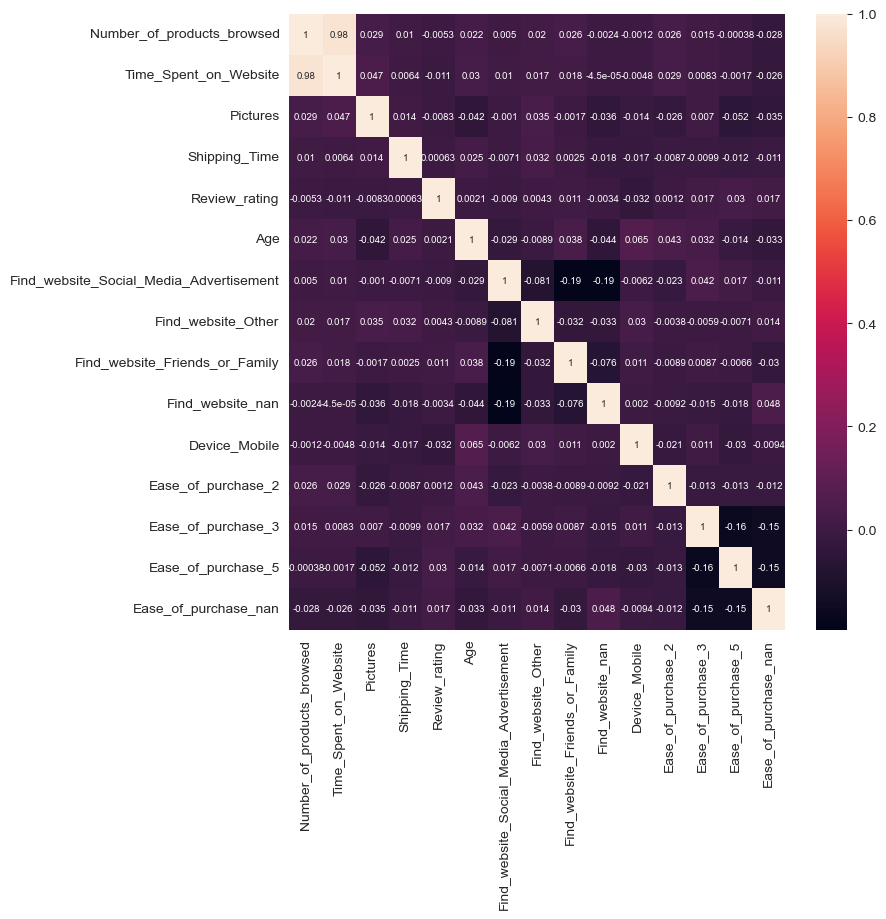

In [138]:
# Set the size of the figure
plt.figure(figsize=(8,8))

#Select independent variables from df2
independent_variables = df_imp.iloc[:, 1:]

#create correlation matrix
matrix = independent_variables.corr()

#create heatmap from the correlation matrix
sns.heatmap(matrix, annot = True, annot_kws={"fontsize":7})

print(scipy.stats.pearsonr(df_imp['Review_rating'], df_imp['Age']))
print(scipy.stats.pearsonr(df_imp['Time_Spent_on_Website'], df_imp['Number_of_products_browsed']))
print(scipy.stats.pearsonr(df_imp['Pictures'], df_imp['Shipping_Time']))

With the dataset that has missing values, `Time_Spent_on_Website` and `Number_of_products_browsed` still have high correlation. I need to remove one for the model.

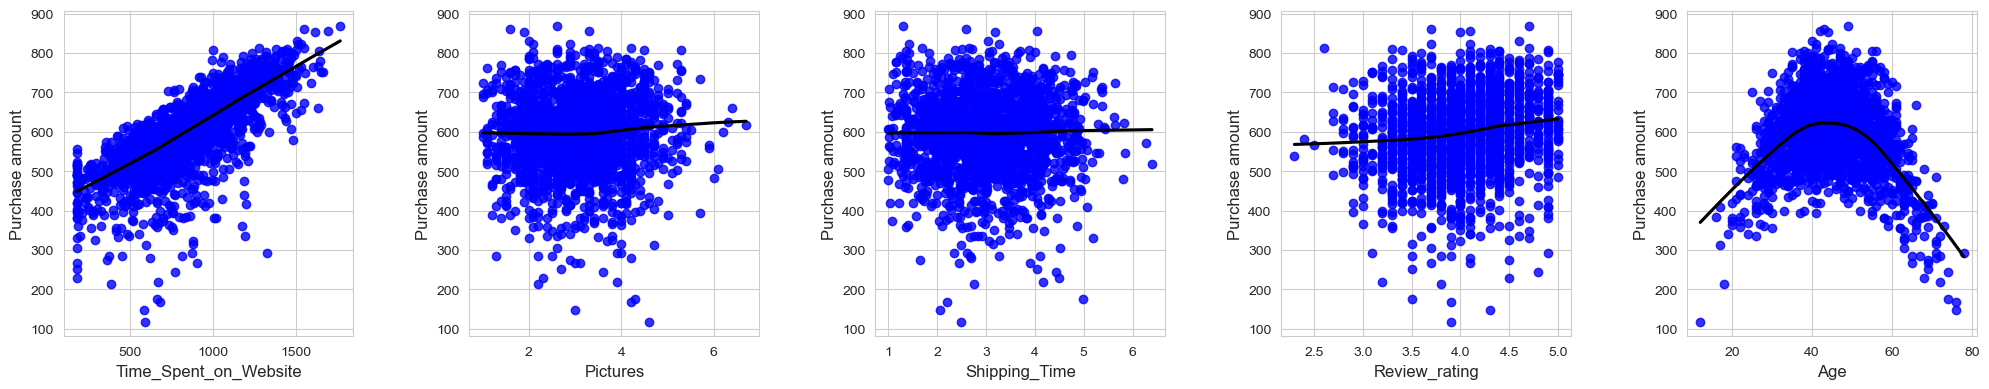

In [139]:
nx = 5
ny = 1
selected_cols = ['Time_Spent_on_Website', 'Pictures', 'Shipping_Time', 'Review_rating', 'Age']

fig, axs = plt.subplots(ny, nx, figsize=(20, 4))
for i, col in enumerate(selected_cols):
    ax = axs[int(i / ny)]
    sns.regplot(data=df_imp, x=col, y='Purchase_Amount', ax=ax, lowess = True, color='b', line_kws={"color": "black"})
    ax.set_xlabel(col, fontsize = 12)
    ax.set_ylabel("Purchase amount", fontsize=12)
fig.tight_layout()
plt.subplots_adjust(wspace=0.4)

With the dataset that has missing values, `Age` still has non-linear relationship.

In [140]:
#create squared variable
df_imp['Age2'] = pow(df_imp.Age,2)

I use Mice to create a model with missing values

In [141]:
df_imp[['Time_Spent_on_Website','Pictures','Shipping_Time', 'Review_rating']]= scaler.fit_transform(df_imp[['Time_Spent_on_Website', 'Pictures', 'Shipping_Time', 'Review_rating']]) #standardized relevant variables

In [146]:
#1 Load the packages
import statsmodels.api as sm
from statsmodels.imputation import mice
#2 turn the data into a MICE dataset
imp = mice.MICEData(df_imp)
#3 Specify the model on which the imputations need to be done
model = mice.MICE('Purchase_Amount ~ Time_Spent_on_Website + Pictures + Shipping_Time + Review_rating + Age2 + Find_website_Social_Media_Advertisement + Find_website_Other + Find_website_Friends_or_Family + Find_website_nan + + Device_Mobile + Ease_of_purchase_2 + Ease_of_purchase_3 + Ease_of_purchase_5 + Ease_of_purchase_nan ', model_class=sm.OLS, data=imp).fit()
print(model.summary())

                                          Results: MICE
Method:                           MICE                        Sample size:                 1855   
Model:                            OLS                         Scale                        3971.22
Dependent variable:               Purchase_Amount             Num. imputations             10     
--------------------------------------------------------------------------------------------------
                                         Coef.   Std.Err.    t     P>|t|   [0.025   0.975]   FMI  
--------------------------------------------------------------------------------------------------
Intercept                               644.8267   4.2427 151.9862 0.0000 636.5113 653.1422 0.0000
Time_Spent_on_Website                    75.0999   1.4670  51.1920 0.0000  72.2246  77.9752 0.0000
Pictures                                 -1.6491   1.4719  -1.1204 0.2625  -4.5340   1.2357 0.0000
Shipping_Time                            -1.3792   1.